In [8]:
pip install stop_words

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=2c944b62dc279e205079b1d1dc1d14c777a25059432d2f92b2f7fcac9e7721f2
  Stored in directory: /home/shaury/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/shaury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/shaury/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [13]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import pandas as pd
import gensim

In [2]:
from common.get_topic import *
from collections import Counter

In [3]:
class GetTopic():

    def topicmodeling(self, text):
        topic_model_result = []
        if type(text) == list:
            # Iterating through data
            for line in text:
                tm = TopicModel.topic_modelling(line)
                topic_model_result.append(tm[0])
        elif type(text) == str:
            tm = TopicModel.topic_modelling(text)
            topic_model_result.append(tm[0])

        if len(topic_model_result) > 0:
            topic_model_result = [w for tw in topic_model_result for w in tw]
            return {'topic_analysis': dict(Counter(topic_model_result))}
        else:
            return {'topic_analysis': None}

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('./voted-kaggle-dataset.csv')

In [6]:
df.head()

,Title,Subtitle,Owner,Votes,Last Update,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1233,2016-11-05,crime\nfinance,CSV,144 MB,ODbL,"440,221 views","52,793 downloads","1,778 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1035,2016-10-24,association football\neurope,SQLite,299 MB,ODbL,"393,924 views","46,025 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1018,2017-09-28,film,CSV,44 MB,Other,"444,535 views","61,705 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...
3,Human Resources Analytics,Why are our best and most experienced employee...,Ludovic Benistant,832,2016-11-30,employment,CSV,553 KB,CC4,"309,644 views","47,350 downloads","1,772 kernels",32 topics,https://www.kaggle.com/ludobenistant/hr-analytics,This dataset is simulated\nWhy are our best an...
4,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,785,2017-07-19,crime\nterrorism\ninternational relations,CSV,144 MB,Other,"186,621 views","26,091 downloads",609 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr..."


In [14]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
en_stop = get_stop_words('en')
lemmatizer = WordNetLemmatizer()

In [21]:
texts = []
for i in df['Description'].iteritems():
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [raw for raw in tokens if not raw in en_stop]
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in stopped_tokens]
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    texts.append(new_lemma_tokens)

In [24]:
Texts = []
for text in texts:
    Texts.append(" ".join(text))

In [28]:
model = GetTopic()
topic = model.topicmodeling(Texts) 

In [33]:
counts = sorted(topic['topic_analysis'].items(),key = lambda x : (x[1],x[0]),reverse=True)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
x = np.arange(0,10)
y = [i[1] for i in counts[0:10]]
names = [i[0] for i in counts[0:10]]

/home/shaury/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


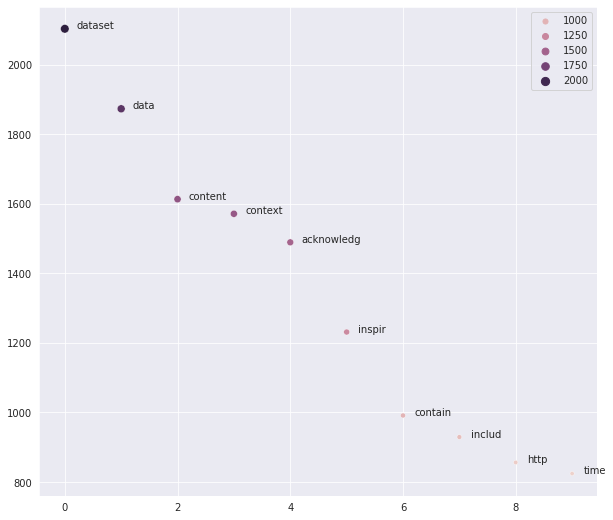

In [50]:
plt.figure(figsize=(10,9))
sns.scatterplot(x,y,hue = y,size=y) 
for i, name in enumerate (names):
    plt.text(x[i]+0.2, y[i]+0.2, name)
plt.savefig('./plot.jpg')